In [35]:
import os

In [36]:
os.getcwd()

'C:\\Users\\acer\\Desktop\\PYTHON_BOOTCAMP'

In [37]:
os.chdir (r"C:\Users\acer\Desktop\\PYTHON_BOOTCAMP")

In [38]:
os.getcwd()

'C:\\Users\\acer\\Desktop\\PYTHON_BOOTCAMP'

In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pylab

import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from patsy import dmatrices

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [40]:
banka=pd.read_csv('hmelq.csv')
df=banka.copy()
banka.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [41]:
print (df.isnull().values.any())  # null var mı diye bakıyoruz

True


In [42]:
df.dropna(inplace = True)   # null değerleri temizliyoruz

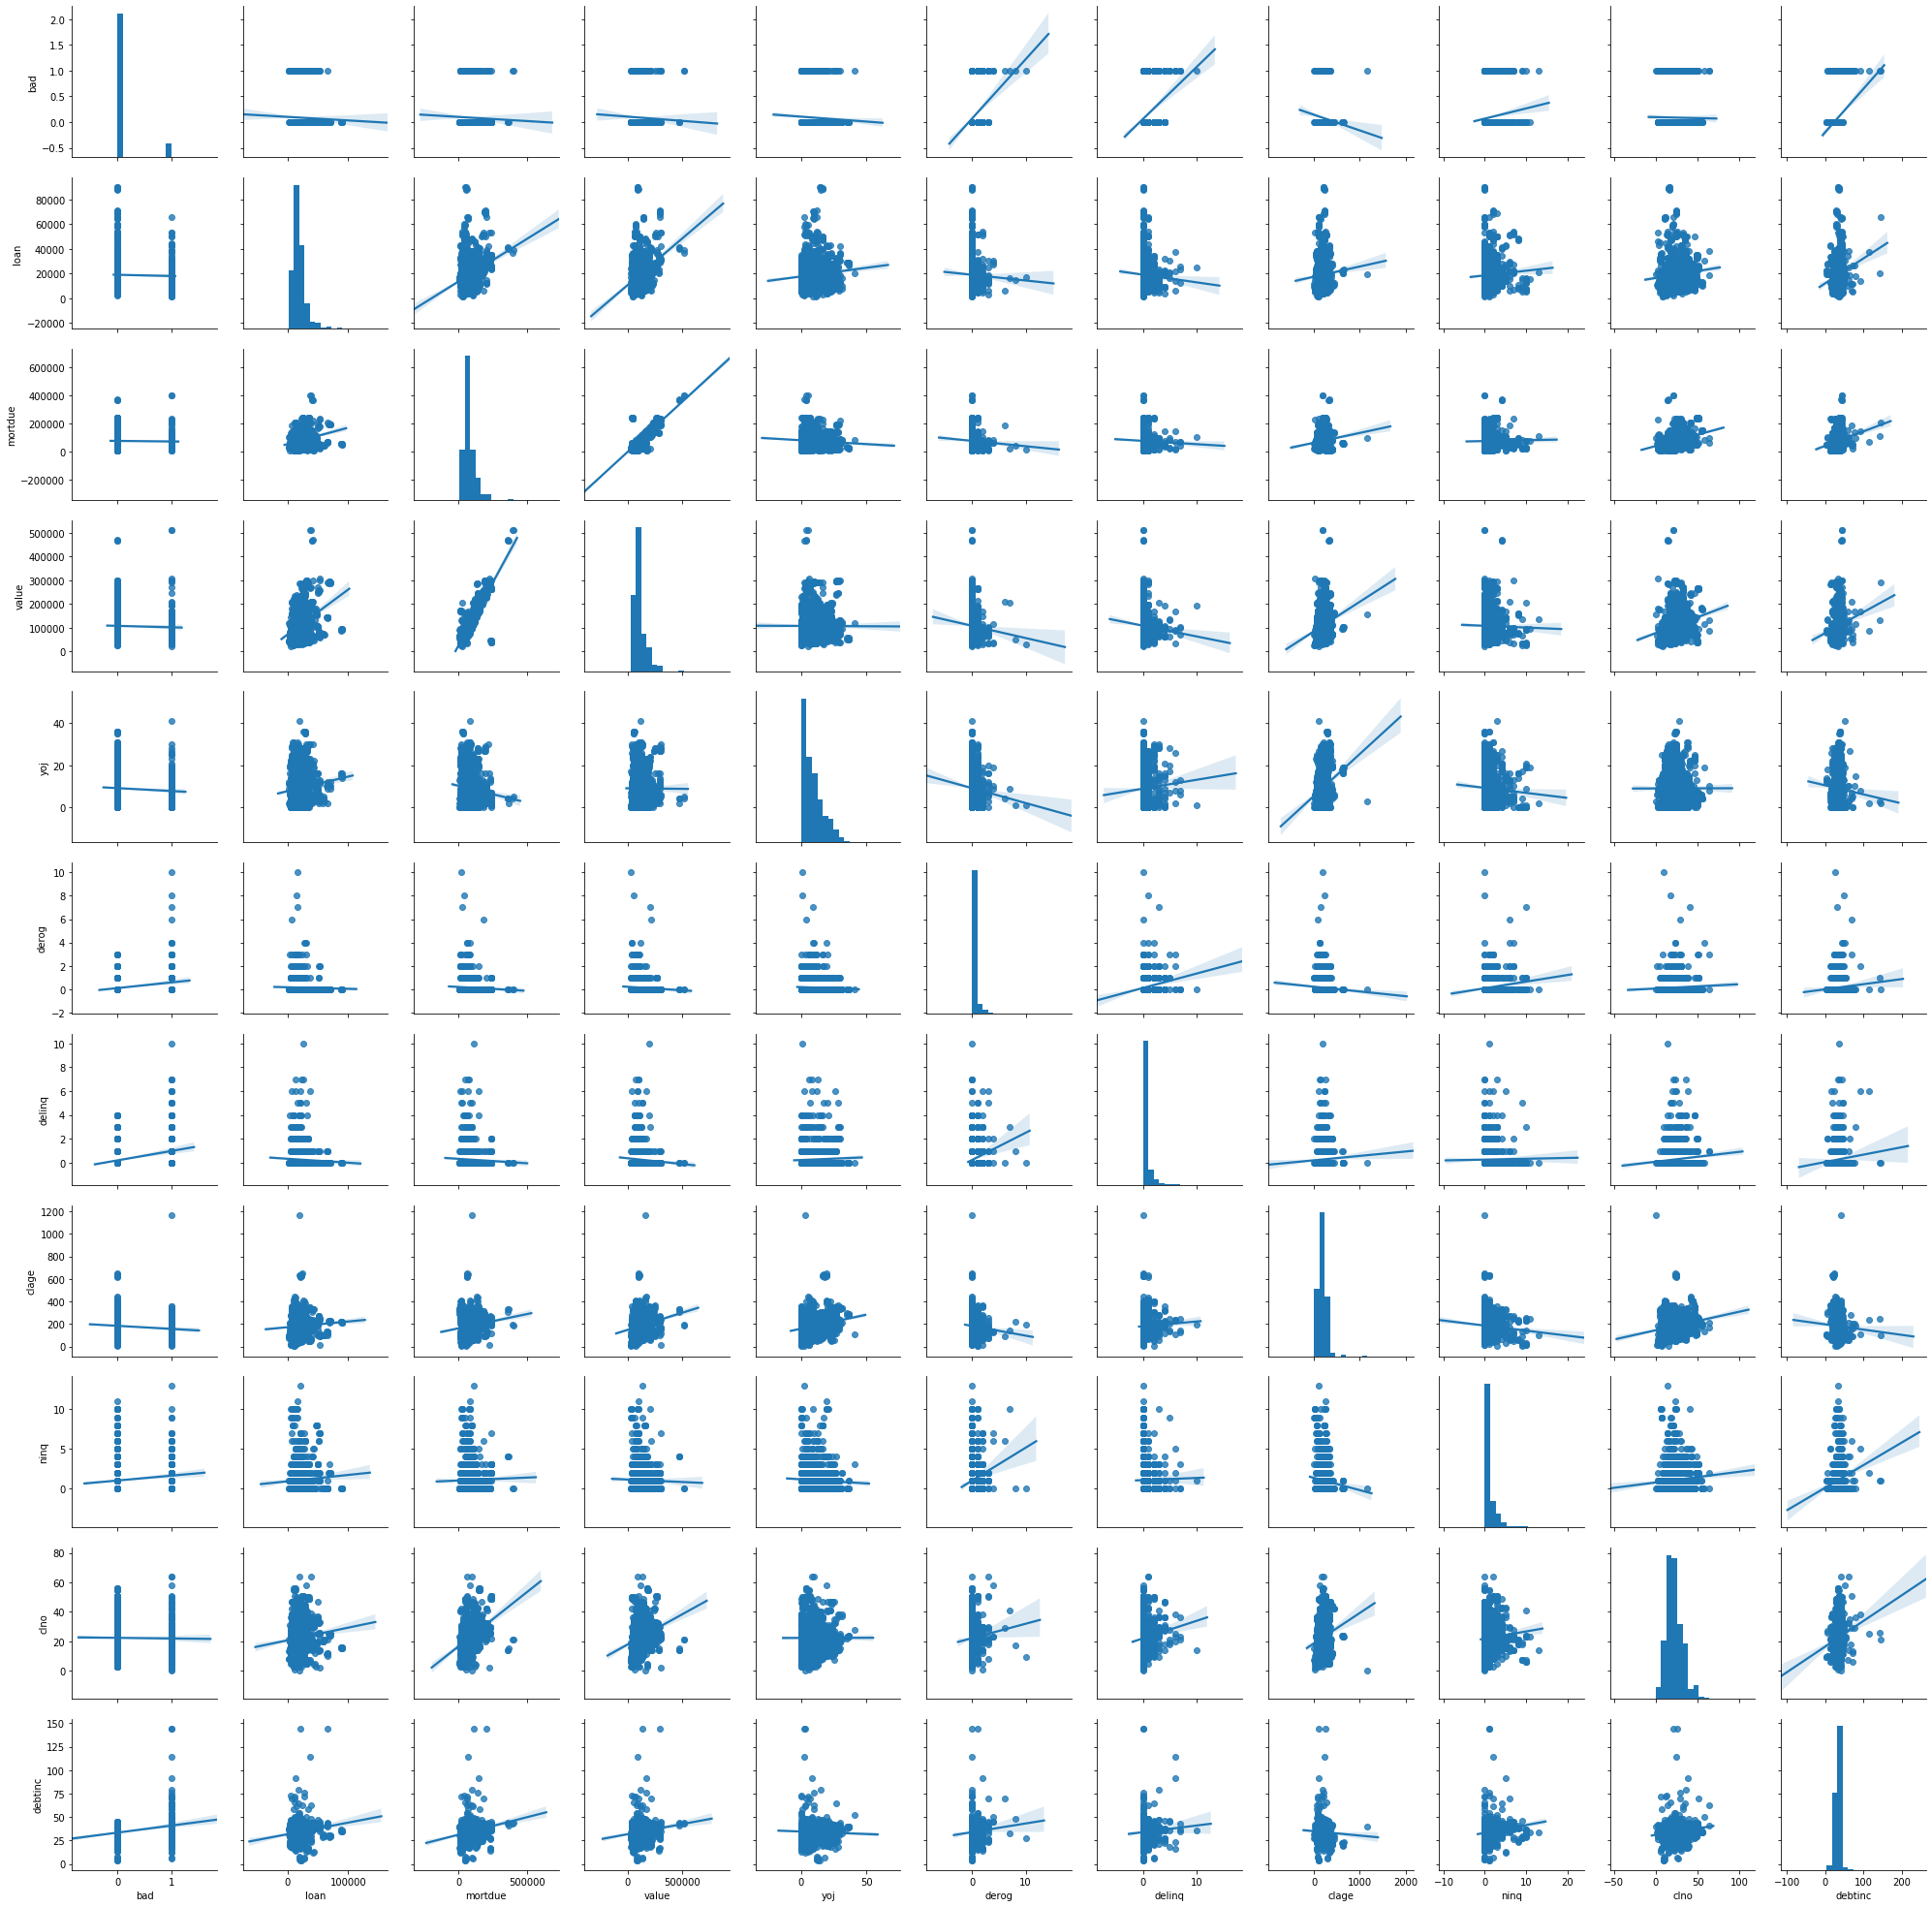

In [43]:
import seaborn as sns
sns.pairplot(df,kind ="reg")

# Grafikleri incelediğimizde numerik değ. arasında dogrusal ilişki olduğunu düşündüğümüz değ. belirliyoruz.

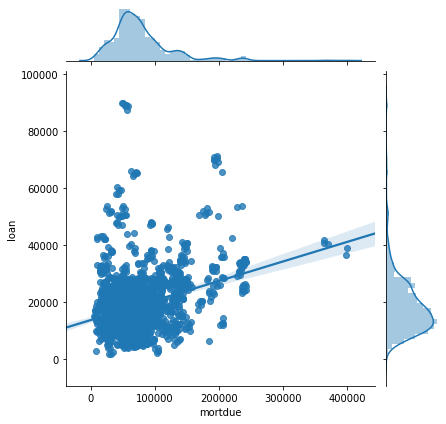

In [44]:
sns.jointplot(x="mortdue", y= "loan", data = df, kind ="reg")

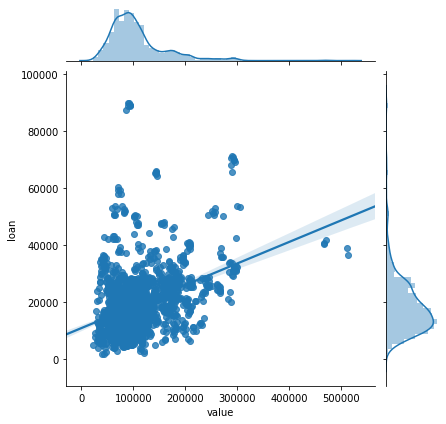

In [45]:
sns.jointplot(x="value", y= "loan", data = df, kind ="reg")

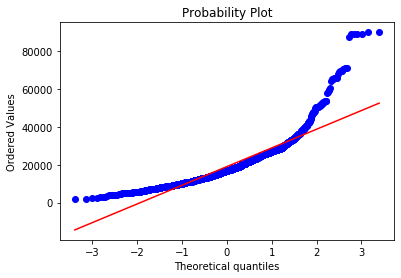

In [46]:
import scipy.stats as stats
import pylab
stats.probplot (df["loan"], dist = "norm", plot = pylab)
pylab.show()

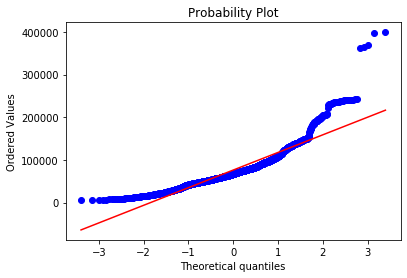

In [47]:
import scipy.stats as stats
import pylab
stats.probplot (df["mortdue"], dist = "norm", plot = pylab)
pylab.show()

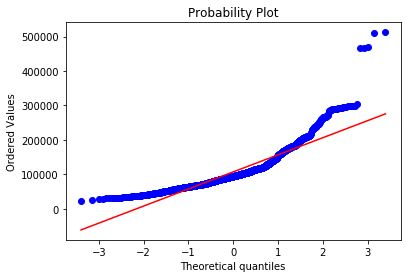

In [48]:
import scipy.stats as stats
import pylab
stats.probplot (df["value"], dist = "norm", plot = pylab)
pylab.show()

In [49]:
# İncelediğimiz değişkenler normal dağılmıyor
# n>30 olmasından dolayı normal dağılıma yakınsıyor kabul ediyoruz

In [50]:
X= df [["mortdue"]]   
X[0:5]

,mortdue
153,94727.0
154,79240.0
155,241931.0
156,62989.0
157,25859.0


In [51]:
X = sm.add_constant(X)
X[0:5]

,const,mortdue
153,1.0,94727.0
154,1.0,79240.0
155,1.0,241931.0
156,1.0,62989.0
157,1.0,25859.0


In [52]:
y = df['loan']
y[0:5]

153    18200
154    21700
155    34100
156     8400
157    17400
Name: loan, dtype: int64

In [53]:
# one-way anova

lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   loan   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     175.0
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           2.22e-38
Time:                        00:33:13   Log-Likelihood:                -21515.
No. Observations:                2018   AIC:                         4.303e+04
Df Residuals:                    2016   BIC:                         4.304e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.379e+04    456.959     30.169      0.000    1.29e+04    1.47e+04
mortdue        0.0684      0.005     13.231      0.000       0.058       0.079
==============================================================================
Omnibus:                     1106.745   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11030.206
Skew:                           2.403   Prob(JB):                         0.00
Kurtosis:                      13.396   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# Regresyon Modeli:
# y (loan)= 1.379e+04 + 0.0684 X(mortdue) + error

Text(0.5, 0, 'mortdue')

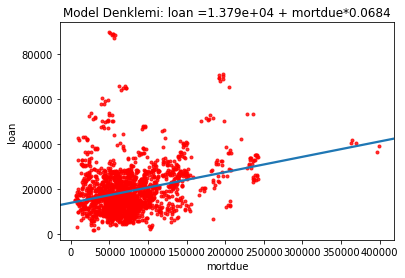

In [55]:
g = sns.regplot (df["mortdue"], df["loan"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title ("Model Denklemi: loan =1.379e+04 + mortdue*0.0684")
g.set_ylabel("loan")
g.set_xlabel("mortdue")

In [56]:
# ÇOK DEĞİŞKENLİ REGRESYON

X = df.drop('loan', axis=1)
y = df['loan']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
training = df.copy()
print(training.shape)

(1614, 12)
(404, 12)
(1614,)
(404,)
(2018, 13)


In [61]:
lm = smf.ols("loan ~mortdue+value+clage+yoj+debtinc", df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   loan   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     85.68
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           8.27e-82
Time:                        00:54:53   Log-Likelihood:                -21404.
No. Observations:                2018   AIC:                         4.282e+04
Df Residuals:                    2012   BIC:                         4.285e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5208.2671   1083.307      4.808      0.000    3083.747    7332.788
mortdue       -0.0469      0.010     -4.635      0.000      -0.067      -0.027
value          0.1068      0.008     12.892      0.000       0.091       0.123
clage         -3.7619      2.711     -1.388      0.165      -9.078       1.554
yoj          135.6365     29.989      4.523      0.000      76.824     194.449
debtinc      158.9399     26.448      6.009      0.000     107.071     210.809
==============================================================================
Omnibus:                     1132.671   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12327.422
Skew:                           2.443   Prob(JB):                         0.00
Kurtosis:                      14.079   Cond. No.                     7.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# r2 değeri çok küçük